In [23]:
import pandas as pd
import numpy as np

In [24]:
df=pd.read_csv('C:/Users/vedan/Downloads/BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [25]:
df.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

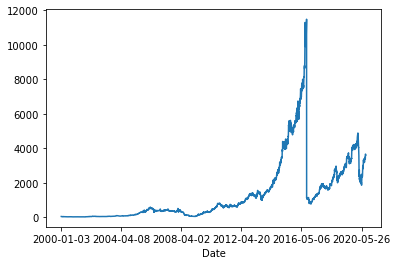

In [26]:
df['VWAP'].plot()

In [27]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [29]:
df.dropna(inplace=True)
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [34]:
data=df.copy()
data.shape

(2291, 14)

In [35]:
data.isna().sum()
data.dropna(inplace=True)

In [36]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [37]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [38]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [39]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [61]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,1.349705e+04,1.837389e+04,8.665128e+11,1.155773e+12,354.841279,463.942320
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,2.434971e+03,1.804733e+04,1.579562e+11,1.136003e+12,272.875429,448.020620
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,9.497080,7.456597,9.298317,1.564005e+04,1.783564e+04,9.982094e+11,1.123423e+12,557.373603,464.778596
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,10.198891,2.002707,9.293713,1.508818e+04,1.313947e+04,9.595224e+11,8.397765e+11,656.385050,455.234163
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,11.352292,11.643560,11.262712,4.575813e+03,1.246914e+04,2.733211e+11,7.983186e+11,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,...,111.840660,89.327396,69.777271,61.471880,3.613401e+06,2.348888e+06,1.315344e+15,8.608028e+14,125273.490429,81831.863468
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,...,100.081633,116.819954,115.027609,100.638138,1.987080e+06,2.403611e+06,7.237865e+14,8.886997e+14,74234.798338,82982.637290
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,...,25.064982,122.216500,62.320569,111.614377,2.641848e+06,2.408580e+06,9.306171e+14,8.850381e+14,91269.616085,82597.470913


In [41]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [42]:
data.shape

(2291, 34)

In [44]:
data.isna().sum()
data.dropna(inplace=True)

In [45]:
independent=['Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7', 'Highrolling_mean_3',
       'Highrolling_mean_7', 'Lowrolling_mean_3', 'Lowrolling_mean_7',
       'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Turnoverrolling_mean_3', 'Turnoverrolling_mean_7',
       'Tradesrolling_mean_3', 'Tradesrolling_mean_7']

In [46]:
training_data=data[0:1800]
testing_data=data[1800:]

In [17]:
!pip install pmdarima --user

In [47]:
from pmdarima import auto_arima

In [21]:
data.isna().sum()
data.dropna(inplace=True)

In [48]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[independent],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.549, Time=3.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.237, Time=1.87 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.361, Time=2.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.333, Time=2.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=1.76 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.246, Time=2.69 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 14.061 seconds


C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [49]:
model.fit(training_data['VWAP'],training_data[independent])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [53]:
forecast=model.predict(n_periods=len(testing_data),exogenous=testing_data[independent])

C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [55]:
testing_data['Forecast_ARIMA']=forecast

<ipython-input-55-b5f031c2b811>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data['Forecast_ARIMA']=forecast


<AxesSubplot:xlabel='Date'>

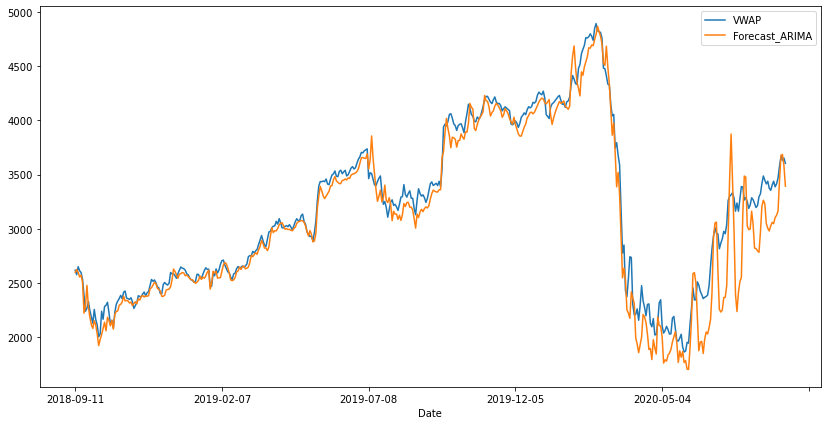

In [57]:
testing_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [59]:
np.sqrt(mean_squared_error(testing_data['VWAP'],testing_data['Forecast_ARIMA']))

187.9362872543051

In [60]:
mean_absolute_error(testing_data['VWAP'],testing_data['Forecast_ARIMA'])

124.75762174100913